# Customer Churn Prediction and Retention Strategy for Telecom Industry

## Step 1. Importing the necessary Libraries

In [1]:
# Importing essential libraries for data analysis and machine learning

# Basic libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For generating all combinations of features (if needed)
from itertools import combinations

# Encoding categorical features and applying Box-Cox transformation
from sklearn.preprocessing import LabelEncoder

# For feature scaling
from sklearn.preprocessing import StandardScaler

## Handling Imbalanced Data
from imblearn.over_sampling import SMOTE  
# Synthetic Minority Over-sampling Technique (SMOTE) for handling class imbalance

## Splitting and Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# train_test_split - Splits data into training and testing sets
# cross_val_score - Performs cross-validation
# GridSearchCV - Hyperparameter tuning using grid search

## Machine Learning Models
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier for ensemble learning
from xgboost import XGBClassifier  # XGBoost classifier, known for high performance in tabular data

## Model Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score,precision_score,recall_score,f1_score
# accuracy_score - Calculates model accuracy
# confusion_matrix - Provides a matrix representation of model predictions
# classification_report - Summarizes precision, recall, F1-score
# roc_auc_score - Computes AUC-ROC score for classification performance

plt.style.use("fivethirtyeight")

## Step 2. Loading the Data

In [2]:
# Load the Dataset
try:
    df = pd.read_csv("Telco-Customer-Churn.csv")
    print("Dataset loaded successfully! ✅")
except FileNotFoundError:
    print("Error: File not found. Please check the file path. ❌")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully! ✅


## Step 3. Exploring the Data

In [3]:
# Display first 5 rows of the dataset to understand its structure
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Displaying all the column names in the dataset
print("The columns of the dataset are : \n", df.columns)

The columns of the dataset are : 
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
# Display dataset shape (rows, columns)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset contains 7043 rows and 21 columns.


In [6]:
# Display column data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Note:  
Should change the datatype of TotalCharges into numerical datatype

In [7]:
# Generating summary statistics for numerical columns in the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Generating summary for categorical columns in the dataset
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [9]:
#  Check for missing values in each column
missing_values = df.isnull().sum()

# Display only columns that have missing values
missing_values = missing_values[missing_values > 0]

if missing_values.empty:
    print("✅ No missing values found in the dataset.")
else:
    print("❗ Missing Values Detected:")
    print(missing_values)

✅ No missing values found in the dataset.


In [10]:
# Checking the number of duplicate rows in the dataset
duplicate_rows = df.duplicated().sum()

if duplicate_rows == 0:
    print("✅ No duplicate values found in the dataset.")
else:
    print(f"❗Duplicate rows detected: {duplicate_rows}")
    # Optionally display the actual duplicate rows
    print(df[df.duplicated()])


✅ No duplicate values found in the dataset.


In [11]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

In [12]:
# Outlier Detection using IQR method

# Calculate Q1, Q3, and IQR for numerical columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Find outliers
outliers = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))

# Count outliers in each column
outlier_counts = outliers.sum()

# Display outlier counts
print("📊 Outlier Counts per Column:\n")
print(outlier_counts[outlier_counts > 0])

# Optional: Display total number of outliers
print(f"\nTotal outliers detected: {outlier_counts.sum()}")


📊 Outlier Counts per Column:

SeniorCitizen    1142
dtype: int64

Total outliers detected: 1142


##### Note: They should shouldn't consider as Outliers

In [13]:
# Select categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [14]:
# Display unique values for each categorical column
for col in categorical_columns:
    print(f"\n🔹 Column: {col}")
    print(df[col].unique())
    print(f"Total unique values: {df[col].nunique()}")


🔹 Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Total unique values: 7043

🔹 Column: gender
['Female' 'Male']
Total unique values: 2

🔹 Column: Partner
['Yes' 'No']
Total unique values: 2

🔹 Column: Dependents
['No' 'Yes']
Total unique values: 2

🔹 Column: PhoneService
['No' 'Yes']
Total unique values: 2

🔹 Column: MultipleLines
['No phone service' 'No' 'Yes']
Total unique values: 3

🔹 Column: InternetService
['DSL' 'Fiber optic' 'No']
Total unique values: 3

🔹 Column: OnlineSecurity
['No' 'Yes' 'No internet service']
Total unique values: 3

🔹 Column: OnlineBackup
['Yes' 'No' 'No internet service']
Total unique values: 3

🔹 Column: DeviceProtection
['No' 'Yes' 'No internet service']
Total unique values: 3

🔹 Column: TechSupport
['No' 'Yes' 'No internet service']
Total unique values: 3

🔹 Column: StreamingTV
['No' 'Yes' 'No internet service']
Total unique values: 3

🔹 Column: StreamingMovies
['No' 'Yes' 'No internet service']
To

In [15]:
# Check for blank spaces in numerical columns
print("Checking for blank spaces in numerical columns:\n")

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    blank_spaces = df[col].astype(str).str.strip().eq("").sum()  # Count blank spaces
    print(f"{col}: {blank_spaces} blank space(s) found")
    print("-" * 60)  # Improved separator for better readability

Checking for blank spaces in numerical columns:

tenure: 0 blank space(s) found
------------------------------------------------------------
MonthlyCharges: 0 blank space(s) found
------------------------------------------------------------
TotalCharges: 11 blank space(s) found
------------------------------------------------------------


## Step 4. Cleaning the data

In [16]:
# Replace blank spaces with NaN to ensure proper conversion
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert to numeric type, coercing errors (non-numeric values become NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values with 0 (or use df['TotalCharges'].median() if preferred)
df.fillna({'TotalCharges' : 0.0}, inplace=True)

# Confirm the data type
print(f"Updated 'TotalCharges' Data Type: {df['TotalCharges'].dtype}")

Updated 'TotalCharges' Data Type: float64


In [17]:
print(df['TotalCharges'].isnull().sum(), "NaN values found after conversion.")

0 NaN values found after conversion.


In [18]:
# Get summary statistics of numerical columns
df_summary = df.describe()

# Display the summary for better readability
print("Summary Statistics of Numerical Features:\n", df_summary)

Summary Statistics of Numerical Features:
        SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2279.734304
std         0.368612    24.559481       30.090047   2266.794470
min         0.000000     0.000000       18.250000      0.000000
25%         0.000000     9.000000       35.500000    398.550000
50%         0.000000    29.000000       70.350000   1394.550000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


### 4.2 Standardizing and Formatting

In [19]:
# Remove the 'customerID' column since it is not useful for prediction
df.drop(columns= ['customerID'],inplace=True)
print("Dropped 'customerID' column as it is not relevant for modeling ✅")

Dropped 'customerID' column as it is not relevant for modeling ✅


#### Fixing Inconsistent Category

In [20]:
categorical_columns =['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

In [21]:
# Print out the unique values in each standardized categorical column
for col in categorical_columns:
    print(f"Unique values in {col} column after standardization:")
    print(df[col].value_counts())

Unique values in gender column after standardization:
gender
Male      3555
Female    3488
Name: count, dtype: int64
Unique values in Partner column after standardization:
Partner
No     3641
Yes    3402
Name: count, dtype: int64
Unique values in Dependents column after standardization:
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
Unique values in PhoneService column after standardization:
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
Unique values in MultipleLines column after standardization:
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
Unique values in InternetService column after standardization:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
Unique values in OnlineSecurity column after standardization:
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


## Step 5. EDA - Exploratory Data Analysis

### 5.1 Univariate Analysis

#### 5.1.1 Analysing numerical columns with Histplot and Boxplot

In [22]:
def plot_distribution(df, column_name):
    plt.figure(figsize=(12, 4))

    # Histogram with KDE (Kernel Density Estimation)
    plt.subplot(1, 2, 1)
    sns.histplot(df[column_name], kde=True, color="teal")
    plt.title(f"Distribution of {column_name}")

    # Calculate Mean & Median
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    # Plot Mean and Median lines
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="blue", linestyle="--", label="Median")
    plt.legend()

    # Box Plot to check for outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[column_name], color="orange")
    plt.title(f"Boxplot of {column_name}")

    # Show the plots
    plt.show()

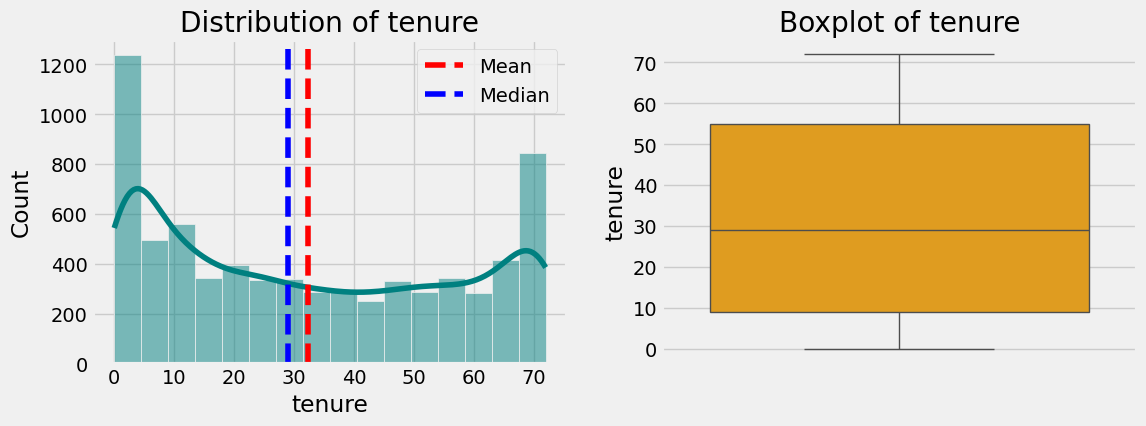

In [23]:
# Plot distribution of 'tenure' to understand customer retention duration
plot_distribution(df,"tenure")

- The tenure distribution is **bimodal**, with peaks at **0-5 years** and **60-70 years**, indicating two distinct employee groups. 
    - The **mean and median** are close, but the distribution is **slightly right-skewed**. 
    - The **boxplot** shows a **wide spread** (IQR: **~5 to 55 years**) with **no extreme outliers**. 
    - This pattern suggests **two hiring waves**—one for **new hires** and another for **long-term employees**.

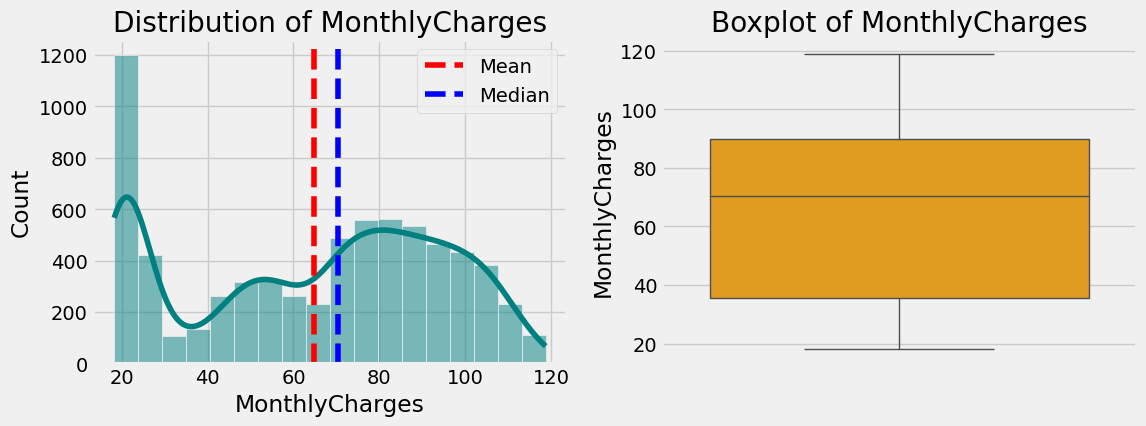

In [24]:
# Plot distribution of 'MonthlyCharges' to analyze how much customers are paying per month
plot_distribution(df, 'MonthlyCharges')

- The **Monthly Charges** distribution is **bimodal**, with peaks around **$20-$30** and **$70-$100**, indicating two pricing tiers. 
    - The **mean is slightly higher than the median**, suggesting a **right-skewed distribution**. 
    - The **boxplot** shows a **moderate spread** (IQR: **~$35 to $90**), with **no extreme outliers**. 
    - This pattern suggests **two customer segments**, possibly **basic and premium plan users**.

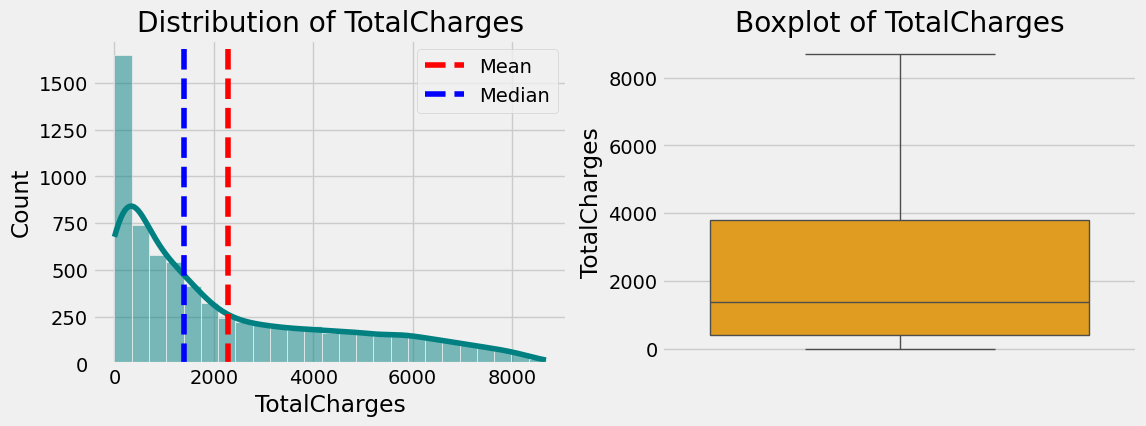

In [25]:
# Plot distribution of 'TotalCharges' to observe the total amount customers have been billed
plot_distribution(df,"TotalCharges")

- The **Total Charges** distribution is **highly right-skewed**, indicating that most customers have lower total charges.  
    - The **mean is greater than the median**, reinforcing the **right-skewness** caused by a few high-paying customers.  
    - The **boxplot** shows a **wide range** with an **interquartile range (IQR) between ~500 and ~4000**, and some **higher values extending beyond 8000**.  
    - The **large spread** suggests that customers have **varied tenure lengths and service levels**, influencing their total charges.

### 5.1.2 Analyzing categorical columns with Pie Plot

In [26]:
categorical_columns = categorical_columns + ['SeniorCitizen']

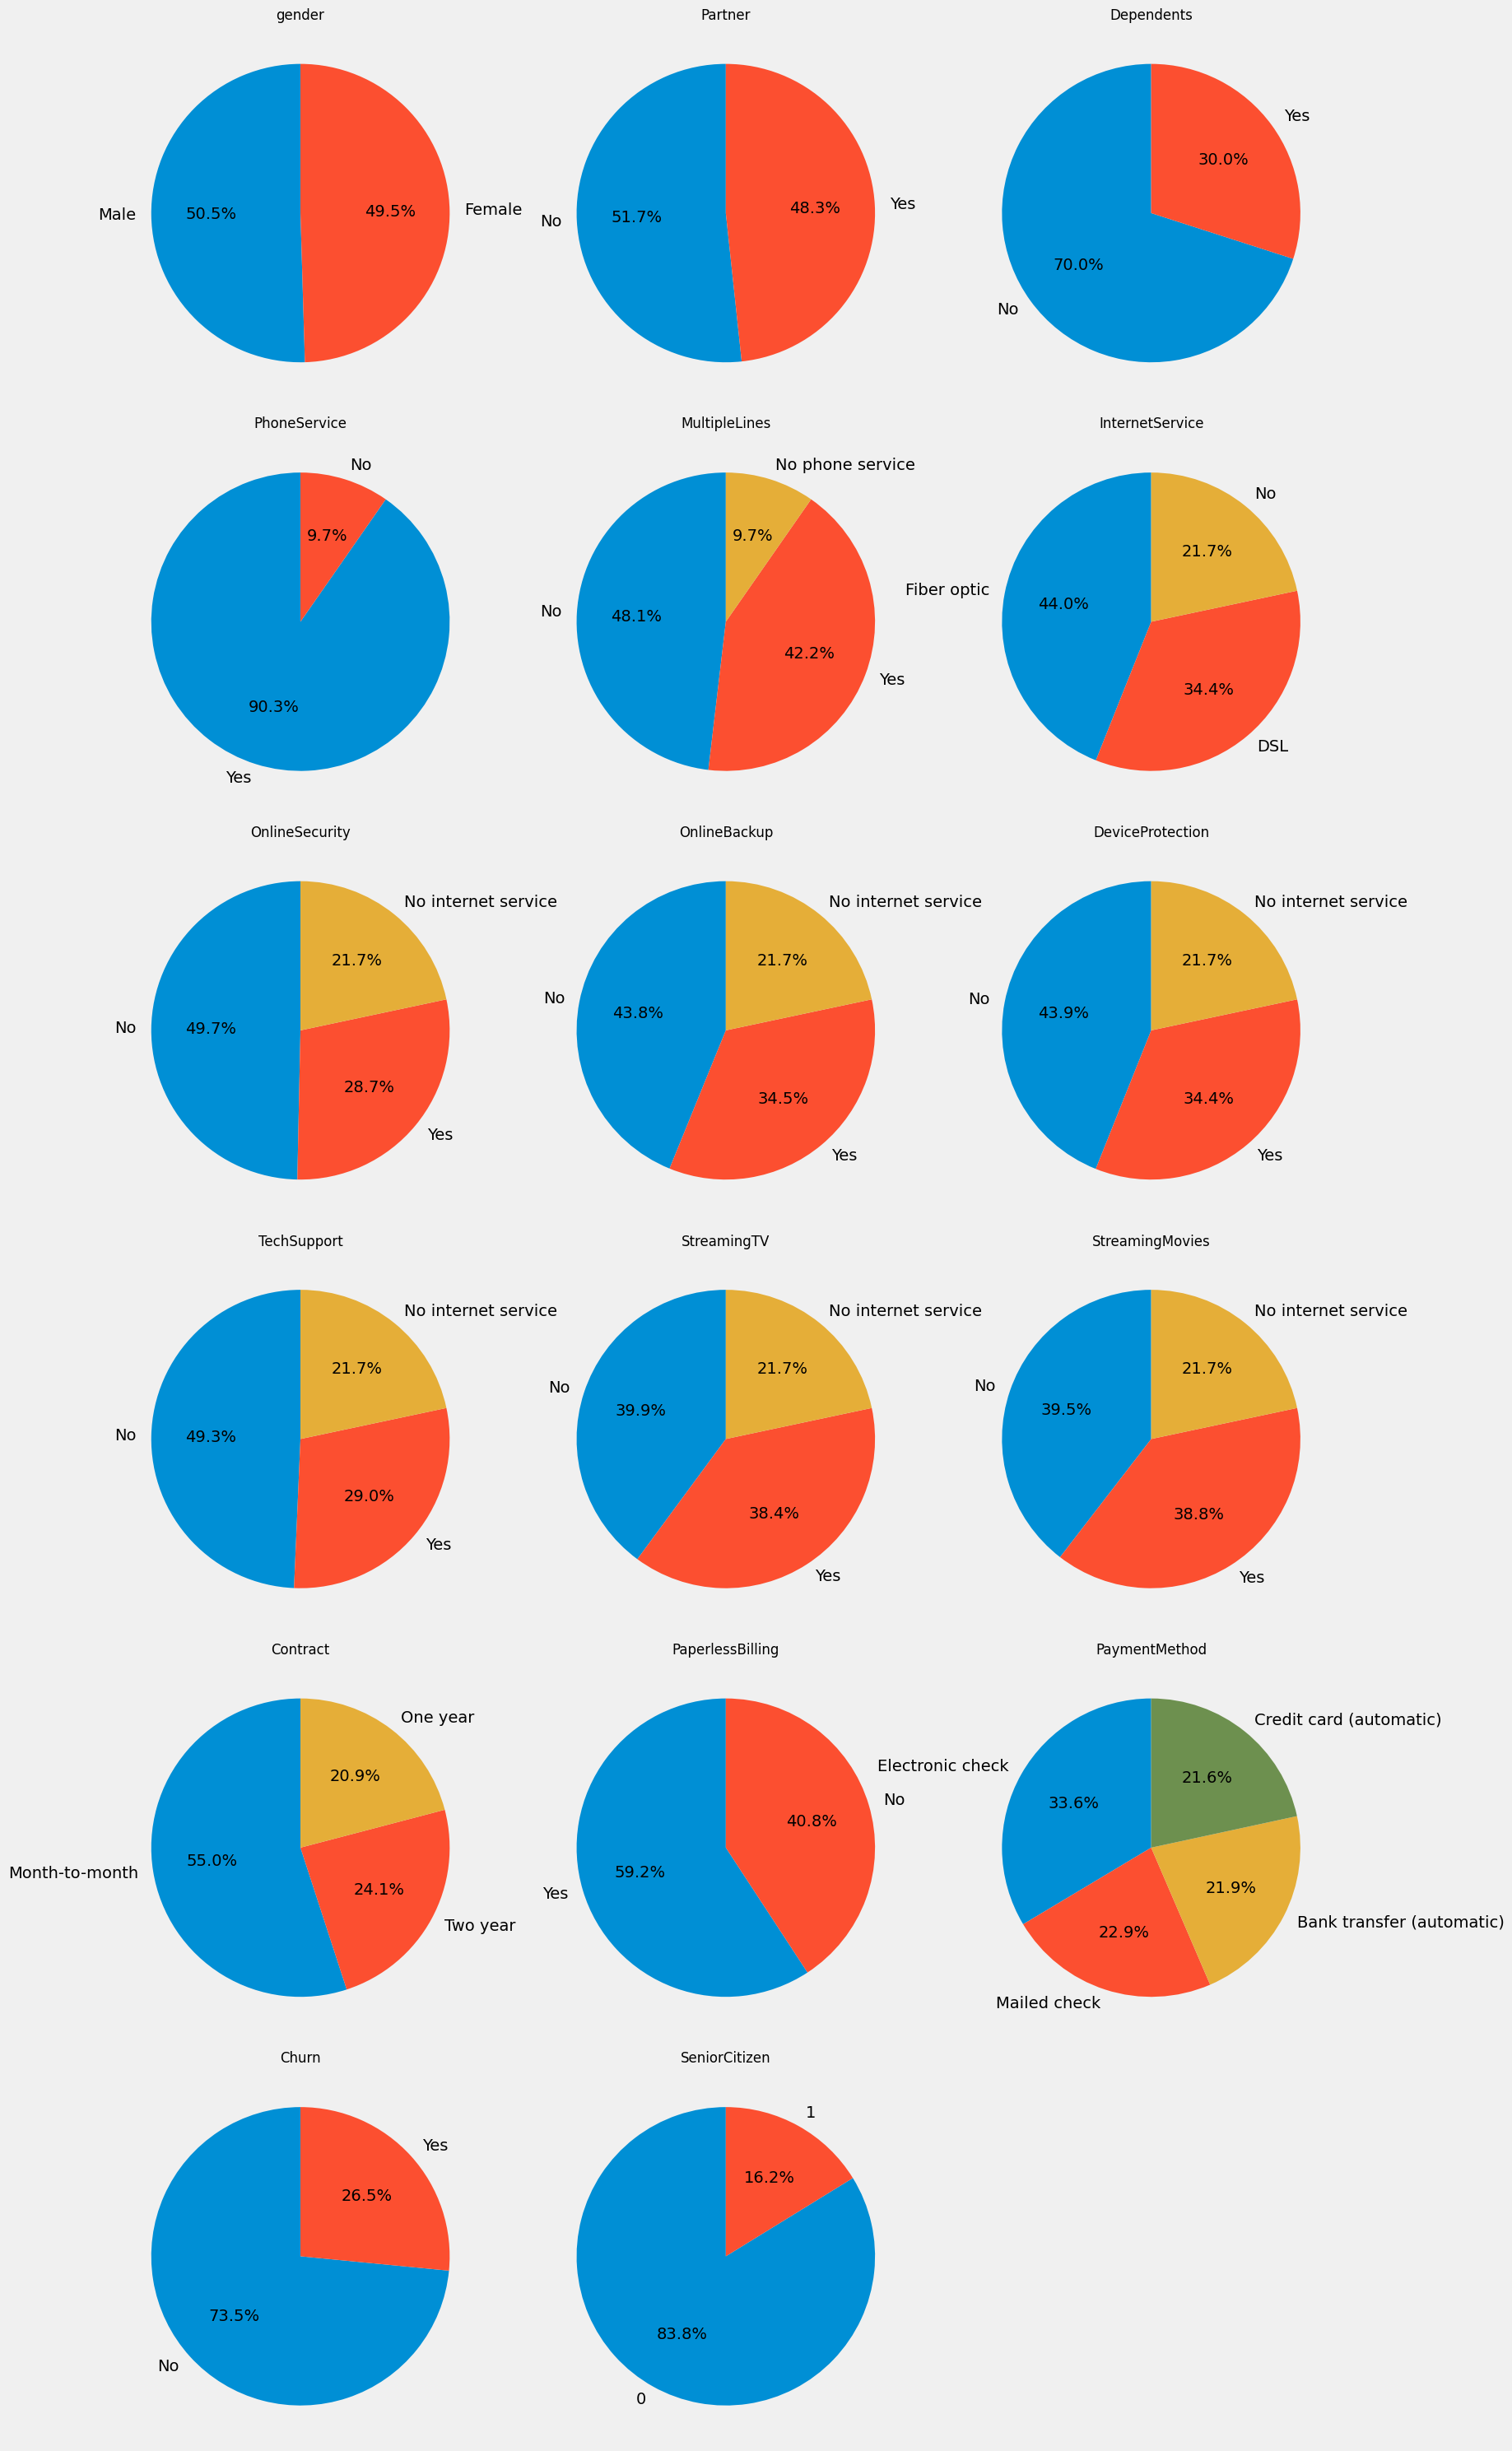

In [27]:
# Set up subplot grid (adjust columns to fit layout nicely)
n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # Flatten in case of single row

# Loop to create pie charts
for i, col in enumerate(categorical_columns):
    data = df[col].value_counts()
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"{col}", fontsize=12)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## 📊 Insights from Pie Charts – Customer Churn Analysis

### 1. Demographics
- Gender distribution is nearly equal; churn is not gender-biased.
- 52% of customers have no partner; 70% have no dependents.

### 2. Phone & Internet Services
- 90% of users have phone service.
- 42% use multiple lines.
- Fiber optic is the most used internet service (44%) but is often linked with higher churn.
- 22% have no internet service.
- Many customers (~44–50%) do not use online security, backup, or device protection.
- About 50% don’t use tech support; around 40% use streaming services.

### 3. Contracts & Billing
- 55% of users are on month-to-month contracts — highly churn-prone.
- Long-term contracts (1–2 years) are less common but more stable.
- 41% of users still use paper billing.
- Electronic check is the most common payment method (33.6%) and may be associated with higher churn.

### 4. Customer Age & Churn
- Only 16% of customers are senior citizens.
- Churn rate is 26.5% — indicating a need for strong retention strategies.

### ✅ Key Takeaways
- Focus on retaining **month-to-month**, **fiber optic**, and **electronic check** customers.
- Increase adoption of support, security, and backup services.
- Encourage **postpaid plans**, **long-term contracts**, and **digital billing** for improved retention.

### 5.2 Bivariate Analysis

#### 5.2.1 Analysisng the numerical columns with correlation matrix

In [28]:
numerical_columns = ['tenure','MonthlyCharges','TotalCharges']

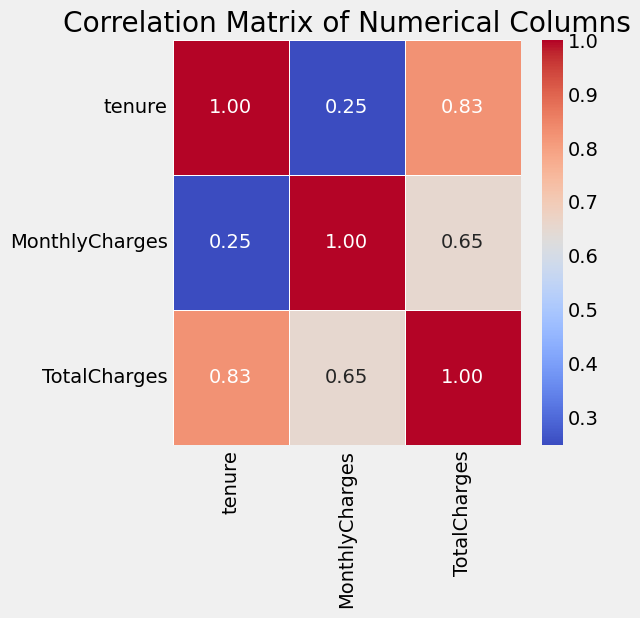

In [29]:
# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(5,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

## 🔗 Correlation Analysis of Numerical Features

The heatmap above displays the correlation between key numerical columns: **tenure**, **MonthlyCharges**, and **TotalCharges**.

### 📌 Observations:
- **Tenure vs TotalCharges**: High positive correlation (**0.83**) — the longer a customer stays, the more they pay over time.
- **MonthlyCharges vs TotalCharges**: Moderately strong positive correlation (**0.65**) — higher monthly charges generally lead to higher total revenue.
- **Tenure vs MonthlyCharges**: Weak correlation (**0.25**) — monthly charges don’t significantly depend on how long a customer has been with the company.

### ✅ Conclusion:
- **TotalCharges** is influenced by both tenure and monthly charges, making it a crucial feature.
- Customers with low tenure and high monthly charges are at higher churn risk.
- Use this insight to create targeted retention offers based on tenure and monthly billing patterns.


#### 5.2.2 Analysing the numerical columns with scatter plot

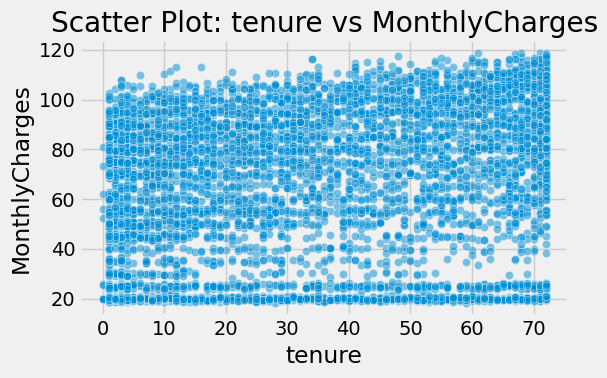

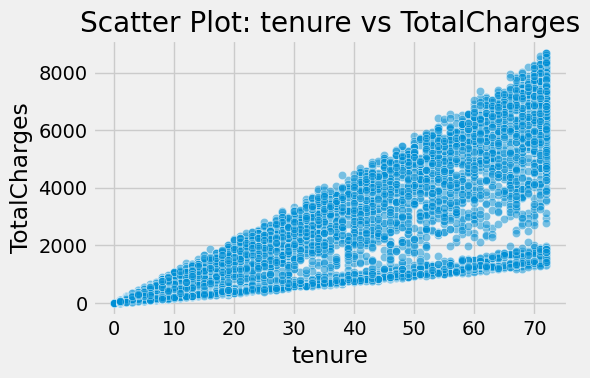

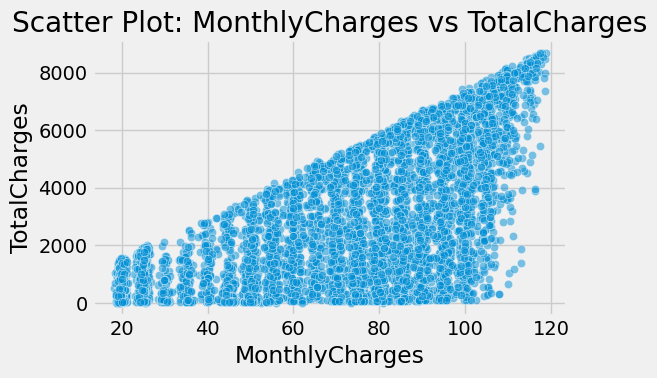

In [30]:
# Plot scatter plots for each pair of numerical columns
for col_x, col_y in combinations(numerical_columns, 2):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col_x], y=df[col_y], alpha=0.5)
    plt.title(f'Scatter Plot: {col_x} vs {col_y}')
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### 5.2.3 Analysing the relation between Categorical(Churn) and Numerical columns with bar plot

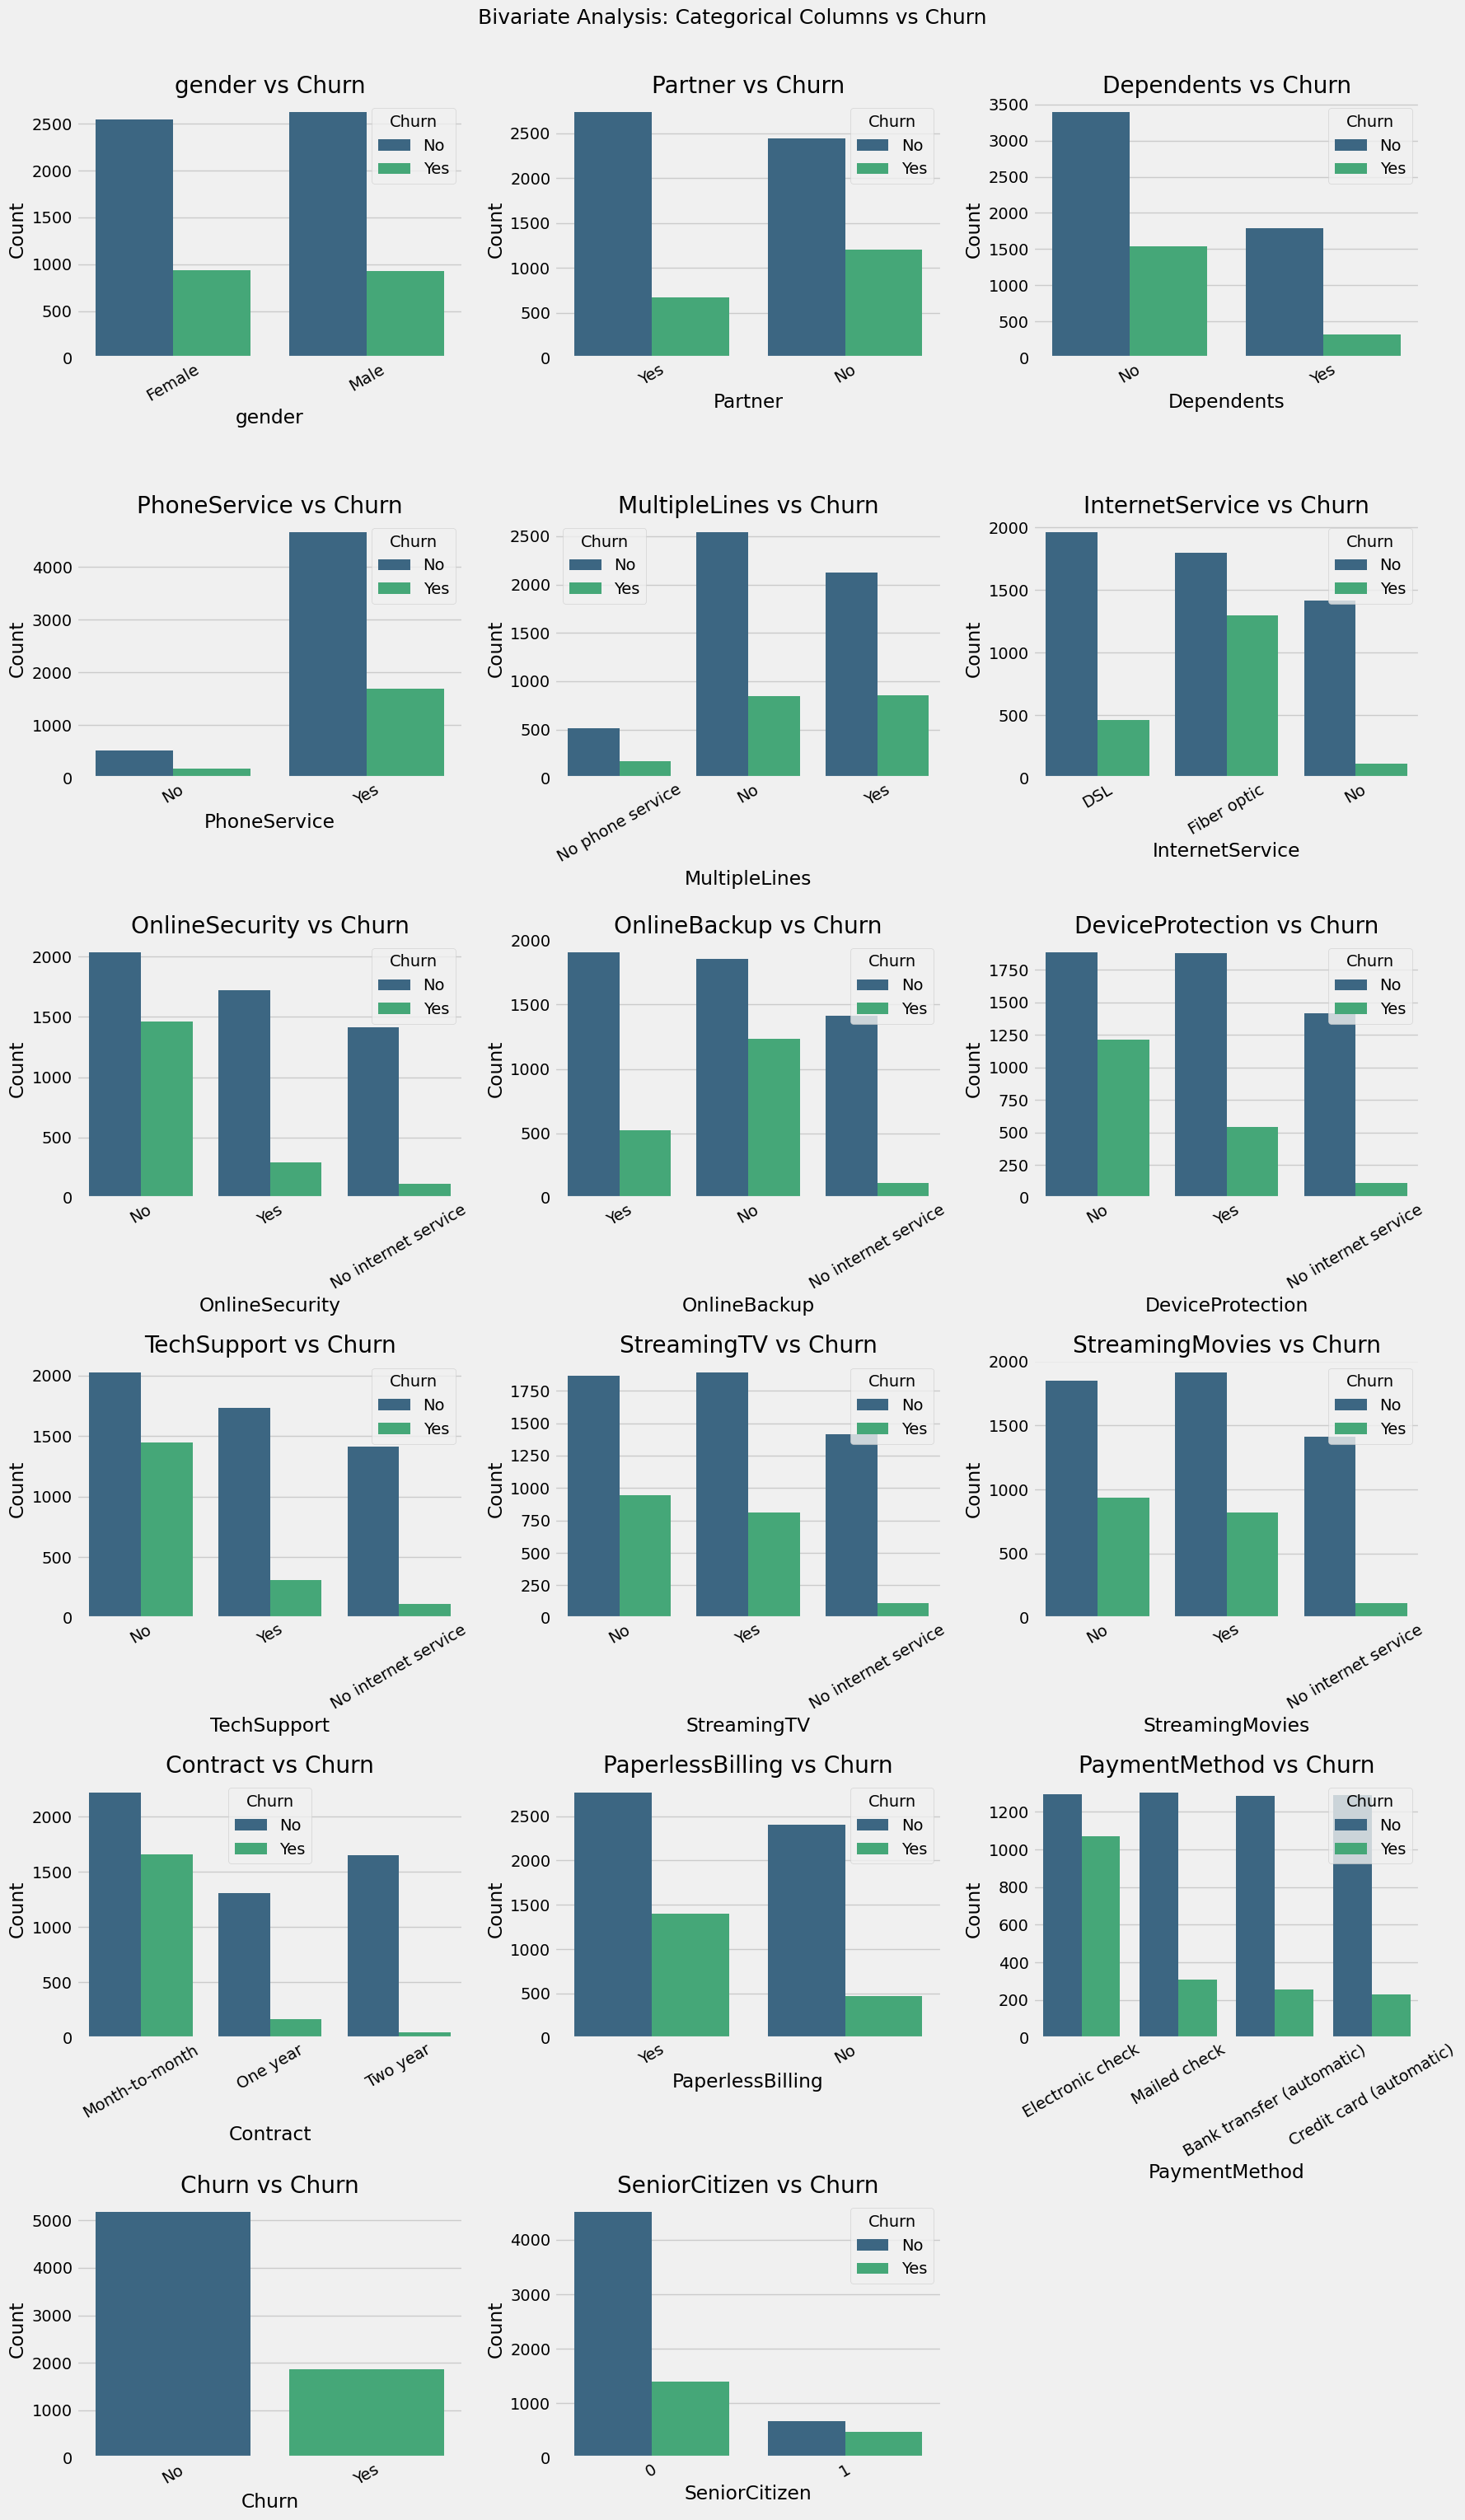

In [31]:
import math

# Combine all categorical columns including 'SeniorCitizen'
categorical_cols = categorical_columns

# Set number of subplots per row
cols = 3
rows = math.ceil(len(categorical_cols) / cols)

# Set the overall figure size
plt.figure(figsize=(18, 5 * rows))

# Loop through and plot each subplot
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=df, x=col, hue='Churn', palette='viridis')
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)  # Rotate labels if needed
    plt.tight_layout()

plt.suptitle('Bivariate Analysis: Categorical Columns vs Churn', fontsize=18, y=1.02)
plt.show()


## Insights

### 👥 Demographic Factors

- **Gender**: Churn is nearly **equal across Male and Female**.
- **Partner**: Customers **without a partner** are more likely to churn.
- **Dependents**: Customers **without dependents** churn more often.

### 📞 Service Subscription Features

- **PhoneService**: Most customers have phone service. Among them, a **noticeable churn exists**, but no strong contrast.
- **MultipleLines**: Customers with **multiple lines churn more** than those without.
- **InternetService**: **Fiber optic users churn more** than DSL or those without internet service.
- **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**:
  - Churn is **higher when these services are not subscribed**.
  - Suggests these services may improve customer retention.

- **StreamingTV**, **StreamingMovies**:
  - Slight increase in churn for users who have these services, but the difference is marginal.

### 🧾 Billing & Contract Features

- **Contract**:
  - Customers with **high tenure** are less likely to churn. 
  - Customers with **higher Monthly Charges** tend to churn more.
- **PaperlessBilling**:
  - Customers using **paperless billing churn more**, possibly linked with digital users preferring short-term or flexible plans.
- **PaymentMethod**:
  - **Electronic check** users have **highest churn**.
  - Users with **automatic payments (bank or credit card)** have lower churn — indicating convenience may enhance retention.

- Customers with **high tenure** are less likely to churn. 
- Customers with **higher Monthly Charges** tend to churn more.
- **Senior Citizens** have a higher churn rate compared to younger customers.
- **Contract Type** affects churn—customers on **monthly contracts** churn more than those on yearly contracts.

### 5.3 Multivariate Analysis


#### Pair plot

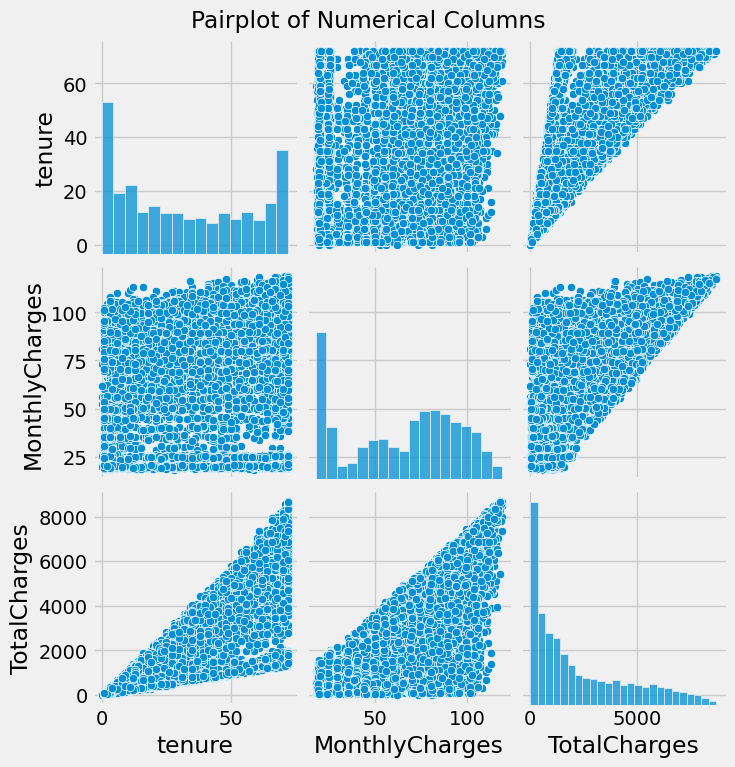

In [32]:
# Pairplot to visualize relationships between numerical columns
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)  # Title with a little space
plt.show()

### 🔍 Key Insights:

#### 📈 1. **TotalCharges vs. Tenure**
- **Strong positive linear relationship**.
- As tenure increases, TotalCharges naturally increase 
- Some points with **low tenure but high TotalCharges** could be outliers or data entry issues.

#### 💰 2. **MonthlyCharges vs. TotalCharges**
- Slight **positive correlation**, but with more variance.
- Customers with similar MonthlyCharges can have vastly different TotalCharges depending on their tenure.
- A **triangular pattern** is seen: high TotalCharges only occur with both high tenure and high MonthlyCharges.

#### 🕒 3. **Tenure vs. MonthlyCharges**
- **No strong linear relationship** — MonthlyCharges vary widely across all tenure levels.
- Suggests pricing may not be dependent on how long a customer has been subscribed.

### ✅ Conclusion:
- **tenure** and **TotalCharges** are tightly coupled — helpful for churn modeling.
- **MonthlyCharges** provides independent information — important for detecting pricing-related churn.
- This visual confirms the need for **feature scaling** (e.g., StandardScaler) due to large range differences when applying ML models.

## Step 6. Feature Engineering

### 6.1 Feature Creation

In [33]:
df_features = df.copy()

# 1️⃣ New Feature: Tenure Group (buckets of time with the company)
df_features['TenureYear'] = pd.cut(df_features['tenure'],
                                     bins=[0, 12, 24,36, 48, 60, 72.1],
                                     labels=[1,2,3,4,5,6],
                                     right=True,include_lowest=True).astype('int')

In [34]:
# 2️⃣ New Feature: Average Monthly Spend
df_features['AvgMonthlySpend'] = df_features['TotalCharges'] / (df_features['tenure'] + 1)  # Avoid division by zero

In [35]:
for col in ['TenureYear','AvgMonthlySpend']:
    print(df_features[col].unique())


[1 3 4 2 6 5]
[ 14.925       53.98571429  36.05       ...  28.87083333  61.32
 102.15671642]


In [36]:
df_features.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'TenureYear',
       'AvgMonthlySpend'],
      dtype='object')

In [37]:
df.head() 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 6.2 Feature Transformation

#### Transforming Categorical features

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [39]:
# Convert the 'Churn' column from categorical to numerical values:
# 'Yes' → 1 (Customer churned)
# 'No'  → 0 (Customer did not churn)
df['Churn'] = df['Churn'].map({"Yes" :1, "No":0})

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [41]:
# Select columns with object (categorical) data type to identify categorical features
object_columns = df.select_dtypes(include="object").columns
object_columns  # Display the categorical columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder

encoders = {}  # Dictionary to store label encoders for each categorical column

# Apply label encoding to each categorical column
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder  # Store encoder for potential inverse transformation

In [43]:
# display all encoders
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [44]:
import pickle # Importing the pickle module for serialization

# Saving the trained LabelEncoders to a file for future use
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders,f)

In [45]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


#### Transsforming numerical features

In [46]:
# Selecting numerical columns for standardization
numerical_cols = ['tenure','MonthlyCharges','TotalCharges']

# Initializing StandardScaler to normalize numerical features
scaler = StandardScaler()

#Applying StandardScaler to transform the numerical columns
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [47]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1
5,0,0,0,0,-0.992402,1,2,1,0,0,2,0,2,2,0,1,2,1.159546,-0.643789,1
6,1,0,0,1,-0.422317,1,2,1,0,2,0,0,2,0,0,1,1,0.808907,-0.145738,0
7,0,0,0,0,-0.910961,0,1,0,2,0,0,0,0,0,0,0,3,-1.163647,-0.872587,0
8,0,0,1,0,-0.177995,1,2,1,0,0,2,2,2,2,0,1,2,1.330711,0.338085,1
9,1,0,0,1,1.206498,1,0,0,2,2,0,0,0,0,1,0,0,-0.286218,0.533044,0


### 6. 3 Feature Selection

C:\Users\hp\AppData\Local\Temp\ipykernel_4144\831285998.py:10: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\hp\OneDrive\Documents\COLLEGE_Project\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


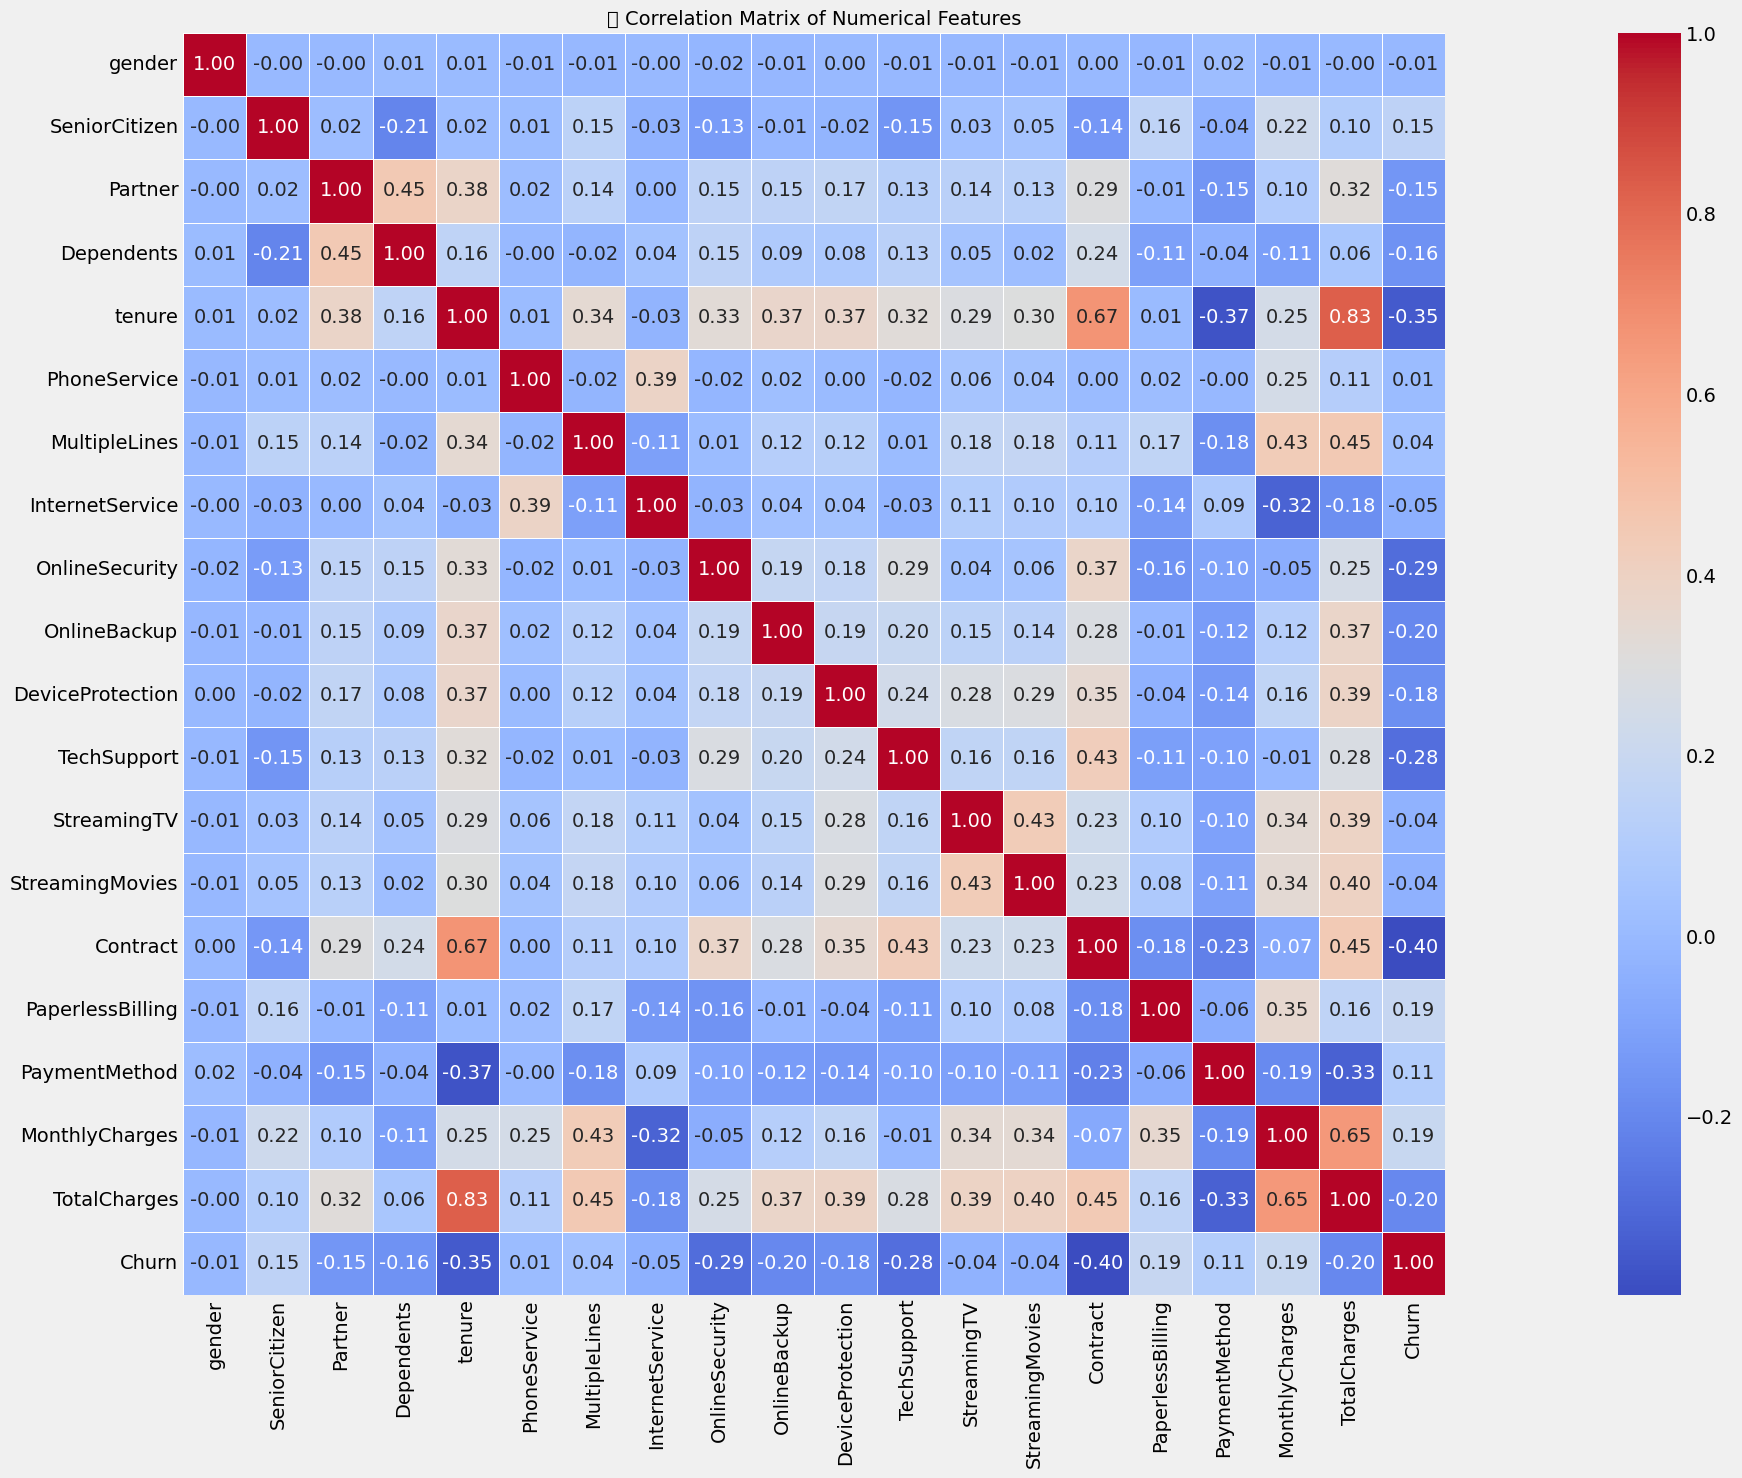

In [48]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(35,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)

# Title for clarity
plt.title("🔍 Correlation Matrix of Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

### 📌 Insights:

#### 🧠 Most Influential Features on Churn:
- **Contract (-0.40)**: Strong negative correlation — customers with long-term contracts are less likely to churn.
- **tenure (-0.35)**: Longer-tenured customers are less likely to churn, indicating loyalty.
- **TechSupport (-0.28)**, **OnlineSecurity (-0.29)**, **OnlineBackup (-0.20)**: Availability of these services reduces churn.
- **MonthlyCharges (0.19)**: Slight positive correlation — higher charges may increase churn.
- **PaperlessBilling (0.19)**: Also slightly increases likelihood of churn.

#### 🧩 Inter-Feature Relationships:
- **tenure and TotalCharges (0.83)**: As expected, the longer a customer stays, the more they pay.
- **Contract and tenure (0.67)**: Contract type is a good indicator of how long someone has stayed.
- **StreamingTV and StreamingMovies (0.43)**: These features are moderately correlated, often subscribed together.

#### ⚠️ Features with Little to No Correlation with Churn:
- **gender, PhoneService, StreamingTV, StreamingMovies**: Have negligible impact on churn directly.

In [49]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [50]:
# Set the threshold for correlation (e.g., 0.9)
threshold = 0.9

# Find the pairs of features with correlation greater than the threshold
high_corr_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]  # Get the column name
            high_corr_features.add(colname)

# Drop highly correlated features
df.drop(columns=high_corr_features, inplace=True)

# Check the result
print("Remaining columns after removing highly correlated features:")
print(df.columns)

Remaining columns after removing highly correlated features:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [51]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.992611,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.172165,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.958066,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.193672,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.938874,1


## Step 7. Model Building and Evaluation

### 7.1 Splitting data into Train & Test Sets

In [52]:
# Splitting Features and Target Variable

X = df.drop(columns=['Churn'])  # Selecting all features except the target variable
y = df['Churn']  # Defining the target variable (Churn)

In [55]:
# Splitting Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # 80% training data, 20% testing data with a fixed random state for reproducibility

In [56]:
# Checking the distribution of target variable in the training set
y_train.value_counts()

Churn
0    4138
1    1496
Name: count, dtype: int64

#### Handling Imbalanced data

In [57]:
# Initializing SMOTE to handle class imbalance by generating synthetic samples
smote=SMOTE(random_state = 42)

# Applying SMOTE to balance the dataset by oversampling the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Checking the class distribution after applying SMOTE
y_train_smote.value_counts()

c:\Users\hp\OneDrive\Documents\COLLEGE_Project\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\hp\OneDrive\Documents\COLLEGE_Project\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "D:\anaconda_software\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\anaconda_software\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "D:\anaconda_software\Lib\subprocess.py", line 1538, in _execute_ch

Churn
0    4138
1    4138
Name: count, dtype: int64

### 7.2 Choosing Model

In [58]:
# Defining a dictionary of classification models for training and evaluation
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

### 7.3 Making Predictions and Model Evaluation

In [60]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)[:, 1]

    print(f"\n{name}:")
    print(f"  Accuracy : {accuracy_score(y_test, preds)}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, preds)}")
    print(f"Classification Report:\n {classification_report(y_test, preds)}")
    if proba is not None:
        print(f"  ROC AUC  : {roc_auc_score(y_test, proba)}")


Random Forest:
  Accuracy : 0.7757274662881476
Confusion Matrix:
 [[844 192]
 [124 249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1036
           1       0.56      0.67      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409

  ROC AUC  : 0.8304625958781454

XGBoost:
  Accuracy : 0.7707594038325053
Confusion Matrix:
 [[837 199]
 [124 249]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84      1036
           1       0.56      0.67      0.61       373

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409

  ROC AUC  : 0.8287404121854525


### 7.4 Model Optimization (Hyperparameter Tuning)

#### with GridSearchCV

In [61]:
# Defining hyperparameter grids for model tuning
'''hyperparameters = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],  # Number of trees in the forest
        "max_depth": [5, 10, None],  # Maximum depth of the trees
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],  # Learning rate for boosting
        "max_depth": [3, 5, 7],  # Maximum depth of trees

    }
}'''

hyperparameters = {
    "Random Forest": {
        "n_estimators": [50, 100, 200, 300],
        "max_depth": [5, 10, None],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.05, 0.1, 0.2],
        "max_depth": [3, 5, 7, 9],
        "n_estimators": [50, 100, 200],
        "subsample": [0.7, 0.8, 0.9]
    }
}

#### Finding The Best Parameters

In [62]:
# Dictionary to store the best-tuned models
best_models = {}

# Loop through each model and perform hyperparameter tuning
for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    # Perform GridSearchCV for hyperparameter tuning
    grid = GridSearchCV(
        estimator=model,
        param_grid=hyperparameters[model_name],
        cv=3,  # 3-fold cross-validation
        scoring="accuracy"  # Using accuracy as the evaluation metric
    )

    # Fit the model on the SMOTE-resampled training data
    grid.fit(X_train_smote, y_train_smote)

    # Store the best model with the optimal hyperparameters
    best_models[model_name] = grid.best_estimator_

    # Print the best parameters and accuracy for each model
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best Accuracy for {model_name}: {grid.best_score_:.2f}\n")

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Accuracy for Random Forest: 0.83

Tuning XGBoost...
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.7}
Best Accuracy for XGBoost: 0.82



In [63]:
# Define the models with best parameters
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=9,
    learning_rate=0.1,
    subsample=0.7,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Dictionary to loop through models
models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

In [64]:
# Making predictions and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_smote, y_train_smote)
    y_test_preds = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_test_preds)
    roc_auc = roc_auc_score(y_test, y_test_prob)
    print(f"{name} Accuracy: {acc}")
    print(f"{name} ROC AUC: {roc_auc}")
    print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_test_preds)}")
    print(f"\n{name} Classification Report:\n{classification_report(y_test, y_test_preds)}")


Training Random Forest...
Random Forest Accuracy: 0.7764371894960965
Random Forest ROC AUC: 0.8326389392073038
Confusion Matrix:
 [[846 190]
 [125 248]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1036
           1       0.57      0.66      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409


Training XGBoost...


c:\Users\hp\OneDrive\Documents\COLLEGE_Project\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:06:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.7785663591199432
XGBoost ROC AUC: 0.8267917956255758
Confusion Matrix:
 [[857 179]
 [133 240]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1036
           1       0.57      0.64      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



In [65]:
print(y_test_preds)
print(y_test_prob)

[1 0 0 ... 0 0 1]
[0.9157867  0.46312556 0.00742601 ... 0.02498807 0.00145696 0.5092749 ]


In [66]:
# Assume rf_model is already trained and identified as best model
best_model = rf_model

# Save the model to a pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


In [67]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [68]:
with open("best_model.pkl","rb") as f:
    loaded_model = pickle.load(f)
with open("encoder.pkl", "rb") as f:
    encoders = pickle.load(f)
with open("scaler.pkl", "rb") as f:
    scaler_data = pickle.load(f)

### Making Predictions

In [74]:
def make_prediction(input_data):
    # Convert input to DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Handle missing values
    for col in input_df.columns:
        if input_df[col].isnull().any():
            if input_df[col].dtype == 'object':
                input_df[col].fillna(input_df[col].mode()[0], inplace=True)
            else:
                input_df[col].fillna(input_df[col].median(), inplace=True)

    # Encode categorical columns
    for col, encoder in encoders.items():
        input_df[col] = encoder.transform(input_df[col])
    
    # Scale numerical columns
    num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[num_cols] = scaler_data.transform(input_df[num_cols])
    
    # Predict
    prediction = loaded_model.predict(input_df)[0]
    probability = loaded_model.predict_proba(input_df)[0, 1]
    
    # Return result
    result = "Churn" if prediction == 1 else "No Churn"
    return result, probability


In [75]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Example

In [76]:
# Example input dictionary representing a single customer's data
example_input = {
    "gender": "Female",                # Customer's gender
    "SeniorCitizen": 0,               # Indicates if the customer is a senior citizen (0 = No, 1 = Yes)
    "Partner": "Yes",                 # Whether the customer has a partner
    "Dependents": "Yes",               # Whether the customer has dependents
    "tenure": 6,                       # Number of months the customer has stayed with the company
    "PhoneService": "Yes",             # Whether the customer has phone service
    "MultipleLines": "Yes",            # Whether the customer has multiple phone lines
    "InternetService": "Fiber optic",  # Type of internet service (DSL, Fiber optic, None)
    "OnlineSecurity": "No",           # Whether the customer has online security service
    "OnlineBackup": "Yes",              # Whether the customer has online backup service
    "DeviceProtection": "Yes",         # Whether the customer has device protection
    "TechSupport": "No",              # Whether the customer has tech support
    "StreamingTV": "Yes",              # Whether the customer has a streaming TV service
    "StreamingMovies": "Yes",          # Whether the customer has a streaming movies service
    "Contract": "One year",            # Type of contract (Month-to-month, One year, Two year)
    "PaperlessBilling": "Yes",         # Whether the customer uses paperless billing
    "PaymentMethod": "Credit card (automatic)", # Payment method used by the customer
    "MonthlyCharges": 103.20,           # Monthly charges incurred by the customer
    "TotalCharges": 7362.9             # Total amount charged to the customer
}

In [77]:
# Make a prediction for the given example input
prediction, prob = make_prediction(example_input)

# Display the prediction result and probability score
print(f"Prediction: {prediction}\nProbability: {prob}")

Prediction: No Churn
Probability: 0.3933333333333333


## Step 8. Retention Strategies

✅ Focus on offering longer contracts, bundling tech support, online security, and backup services.
✅ Customers on **monthly contracts** should be targeted with loyalty offers.  
✅ Offer **discounts on high Monthly Charges** to reduce churn.  
✅ Senior Citizens may need **better customer support services**.  
✅ Future Improvement: Use **deep learning models** for better predictions. 